# BLG454E - Learning From Data, Homework 3

In this homework, you are supposed to implement following parts:

 -  **Part 1: SVM and multi-class softmax (40 points)**
     - Refer to Machine Learning Blinks 8 and 9 for this part.
     - ML Blinks 8: https://www.youtube.com/watch?v=KWp_TxnWfSU&list=PLug43ldmRSo1LDlvQOPzgoJ6wKnfmzimQ
     - ML Blinks 9: https://www.youtube.com/watch?v=7bIVFiKpMfg&list=PLug43ldmRSo1LDlvQOPzgoJ6wKnfmzimQ
     
     
 - **Part 2: practice feature selection (20 points)**
     - Refer to Machine Learning Blinks 10 for this part:
     - ML Blinks 10: https://www.youtube.com/watch?v=laeth5oT9YM&list=PLug43ldmRSo1LDlvQOPzgoJ6wKnfmzimQ
     
     
 - **Part 3: solve an SVM optimization problem by hand (40 points)**
 
 
 ### Important Notes:
   - Please complete this template and include any other necessary materials (screenshots of your handwritten solutions etc.) into the HW3 folder. Then zip it again and submit to Ninova.
   - For Part 1, you need to implement the required functions and gradients etc. by yourself. Do not use autograd or any built-in functions.
   - For the Part 2, you can use scikit-learn built-in functions for training an SVM and feature selection. 
   - At Part 3, you can upload the screenshots of your handwritten solutions to the Notebook. But please be sure that your solutions are neat and can be read properly.
   - You can ask your questions on Ninova message board under HW3 header (recommended) or send an e-mail to akti15@itu.edu.tr.
    



In [71]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pdb
import warnings
warnings.filterwarnings('ignore')

## Part 1.1: Code up gradient descent for the soft-margin SVM loss (20 points)

We have seen the margin perceptron and its implementation at previous lectures. SVM loss also uses the margin loss as base and tries to define and maximize a margin between classes as the following figure shows.


<img src="images/part1-1.png" width = "450">


The soft-margin SVM loss with regularization can be calculated using following equation.

<br>
<center> $g(b, w) = \sum_{p=1}^{P} max(0, 1 - y_{p}(b + x_{p}^T w)) + \lambda\left \| w \right \|_2^2$ </center>
<br>

The following template creates w and x vectors as $ \tilde{x}_{p} = \begin{bmatrix} 1\\x_{p}\end{bmatrix}^T$ and $\tilde{w} = \begin{bmatrix}b\\w \end{bmatrix} $



Following function loads data, creates X and y and adds 1's to X vector.

In [9]:
# import training data 
def load_data(csvname):
    # load in data
    data = np.asarray(pd.read_csv(csvname,header = None))

    X = data[:,0:-1]
    y = data[:,-1]
    y.shape = (len(y),1)
    
    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
    
    return X,y

**(10 points)** The following function finds the optimal w values for the given input. The parameters of the function are samples in X, labels in y and the regularization parameter $\lambda$. You need to calculate the gradient of the given soft-margin SVM loss with regularization function and apply gradient descent (you can use Vanilla gradient descent here). **Do not forget to add the regularization term.**

In [10]:
### TODO: YOUR CODE GOES HERE ###
# gradient descent function for softmax cost/logistic regression 
def soft_svm_gradient_descent(X,y,lam):
    # Initializations 
    w = np.random.randn(3,1)        # random initial point
    alpha = 10**-2
    max_its = 2000

    for k in range(max_its):
        grad = np.zeros(w.shape)
        for i in range(X.shape[0]):
            # If max==0 dont update grads, else add -y_i*x_i
            if max(np.zeros(1), 1 - y[i] * np.dot(np.transpose(w), X[i])):
                grad += (-y[i] * X[i]).reshape(grad.shape)
            
        # Regularization
        reg_w = w.copy()
        reg_w[0][0] = 0
        reg_term = 2*lam*reg_w
        grad += reg_term
        
        # take gradient step
        w = w - alpha*grad
        
    return w

**(5 points)** The following plot function plots the data points and the separating line. Here, you need to add $x_1$ and $x_2$ lines to the plot in order to see the margin as shown in Fig 4.14 above. Do not forget that $x_1$ and $x_2$ are parallel to the found separator and the distance between them is $\frac{2}{\left \| w \right \|_2}$.

In [11]:
### TODO: YOUR CODE GOES HERE ###
# plots everything 
def plot_all(X,y,w,lam):
    # custom colors for plotting points
    red = [1,0,0.4]  
    blue = [0,0.4,1]
    w_norm = np.linalg.norm(w)
    d = 1/w_norm
    
    # scatter plot points
    fig = plt.figure(figsize = (4,4))
    ind = np.argwhere(y==1)
    ind = [s[0] for s in ind]
    plt.scatter(X[ind,1],X[ind,2],color = red,edgecolor = 'k',s = 25)
    ind = np.argwhere(y==-1)
    ind = [s[0] for s in ind]
    plt.scatter(X[ind,1],X[ind,2],color = blue,edgecolor = 'k',s = 25)
    plt.grid('off')
        
    # plot separator
    s = np.linspace(-1,1,100) 
    plt.plot(s,(-w[0]-w[1]*s)/w[2],color = 'k',linewidth = 2)
    plt.plot(s+d,(-w[0]-w[1]*s)/w[2],color = 'm',linewidth = 1)
    plt.plot(s-d,(-w[0]-w[1]*s)/w[2],color = 'm',linewidth = 1)
    
    # clean up plot
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.title('soft-margin svm with lambda = ' + str(lam))
    plt.show()

In the following cell you need to run 5 experiments which are:
   - No regularization
   - Regularization with $\lambda = 10^{-2}$
   - Regularization with $\lambda = 10^{-1}$
   - Regularization with $\lambda = 1$
   - Regularization with $\lambda = 10$

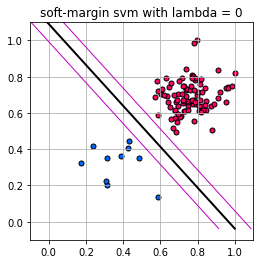

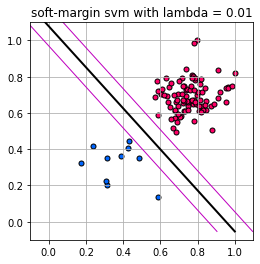

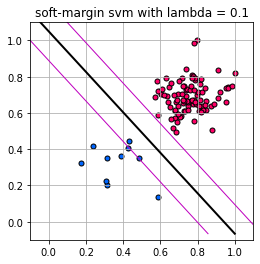

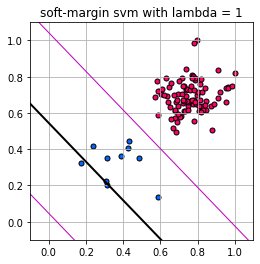

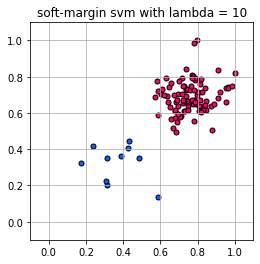

In [12]:
# load in data
X,y = load_data('imbalanced_2class.csv')

# run soft-margin svm over a range of regularization parameters lambda 
lams = [0, 10**-2, 10**-1, 1, 10]
for lam in lams:
    # run gradient descent
    w = soft_svm_gradient_descent(X,y,lam)

    # plot points and separator
    plot_all(X,y,w,lam)

**(5 points)** Answer the following questions.
 - Why do we need regularization?
 - What is the effect of the $\lambda$ on regularization?
 - Compare and discuss your results at previous step, what is the optimum $\lambda$ value?
 - How do we choose $\lambda$ parameter?

*Double click here to insert your answer*

## Part 1.2: Code up gradient descent for the multiclass softmax classier (20 points)

In this exercise you will code up gradient descent to minimize the multi-class softmax cost function on a toy dataset, reproducing the result shown in Fig. 4.20.

<img src="images/part1-2.png" width ="500">

Where $\tilde{x}_{p} = \begin{bmatrix} 1\\x_{p}\end{bmatrix}$ and $\tilde{w} = \begin{bmatrix}b\\w \end{bmatrix} $, $p$ is the sample number and $c$ is the class number, the compact version of the multi-class softmax loss is:

<br>
<center> $g(\tilde{w}_1, ... , \tilde{w}_C) = \sum_{c=1}^{C} \sum_{p\in \Omega_{c}} log ( 1 + \sum_{j=1, j\neq c} e^{\tilde{x}_p^T}(\tilde{w}_j - \tilde{w}_c))$ </center>
    
<br>    

Here, $p\in \Omega_{c}$ means the samples that belongs to class c. 
   

The following function loads the data. There will be 4 classes in our data.

In [13]:
# import training data 
def load_data(csvname):
    # load in data
    data = np.asarray(pd.read_csv(csvname))

    # import data and reshape appropriately
    X = data[:,0:-1]
    y = data[:,-1]
    y.shape = (len(y),1)
    
    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
    X = X.T
    
    return X,y

In the following cell you are supposed to calculate the gradient of the multi-class softmax loss function. Please note that we are calculating a W vector for each of the classes. Thus, the gradient will also has the shape of $(D, C)$ where $N$ is the number of samples and D is the number of features including the bias term. 

<center> $W = \begin{bmatrix} w_{1} \\ w_{2} \\ . \\ . \\ . \\ w_{C} \end{bmatrix}^{T} $ and $ \nabla g = \begin{bmatrix} \nabla_{w_{1}} g \\ \nabla_{w_{2}} g \\ . \\ . \\ . \\ \nabla_{w_{C}} g\end{bmatrix}^{T}$ </center>

In [14]:
### TODO: YOUR CODE GOES HERE ###
# learn all C separators running gradient descent
def gradient_descent(x,y,alpha):
    # formulate full input data matrix X
    C = np.size(np.unique(y))
    W = np.random.randn(3,C)
    isCompact = False
    fantacy = True
    
    # gradient descent loop
    max_its = 1000
    
    for k in range(max_its):
        gradient = np.zeros((x.shape[0],C))
        for p in range(x.shape[1]):
            xp = x[:,p]
            yp = y[p]
            for c in range(4):
                look = np.where(np.arange(1,5)!=(c+1))[0]
                equ = 0
                for j in look:
                    equ+=np.exp(np.dot(np.transpose(xp),(W[:,j]-W[:,c])))
                alt = 1 + equ
                sub = 0
                if(yp == c+1):
                    sub = 1
                gradient[:,c] = gradient[:,c] + (np.divide(1,alt) - sub)*xp
        W = W - alpha*gradient
    return W

The following function plots the datapoints and all of the separators.

In [15]:
# plot data, separators, and fused fule
def plot_all(X,y,W):
    # initialize figure, plot data, and dress up panels with axes labels etc.
    num_classes = np.size(np.unique(y))
    color_opts = np.array([[1,0,0.4], [ 0, 0.4, 1],[0, 1, 0.5],[1, 0.7, 0.5],[0.7, 0.6, 0.5]])
    f,axs = plt.subplots(1,3,facecolor = 'white',figsize = (10,3))
    for a in range(0,3):
        for i in range(0,num_classes):
            s = np.argwhere(y == i+1)
            s = s[:,0]
            axs[a].scatter(X[1,s],X[2,s], s = 30,color = color_opts[i,:])

        # dress panel correctly
        axs[a].set_xlim(0,1)
        axs[a].set_ylim(0,1)
        axs[a].axis('off')

    r = np.linspace(0,1,150)
    for i in range(0,num_classes):
        z = -W[0,i]/W[2,i] - W[1,i]/W[2,i]*r
        axs[1].plot(r,z,'-k',linewidth = 2,color = color_opts[i,:])

    # fuse individual subproblem separators into one joint rule
    r = np.linspace(0,1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((np.ones((np.size(s),1)),s,t),1)
    f = np.dot(W.T,h.T)
    z = np.argmax(f,0)
    f.shape = (np.size(f),1)
    s.shape = (np.size(r),np.size(r))
    t.shape = (np.size(r),np.size(r))
    z.shape = (np.size(r),np.size(r))

    for i in range(0,num_classes + 1):
        axs[2].contour(s,t,z,num_classes-1,colors = 'k',linewidths = 2.25)

Now, we will see the results on 4 class data.

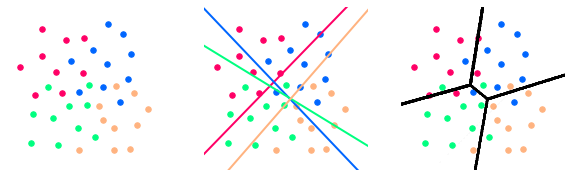

In [17]:
# load data
X,y = load_data('four_class_data.csv')

# perform gradient descent on softmax multiclass
alpha = 10**(-2)    # step length, tune to your heat's desire!
W = gradient_descent(X,y,alpha)           # learn all C vs notC separators
plot_all(X,y,W)
plt.show()

## Part 2: Feature selection using scikit-learn (20 points)

In this part, we will use scikit-learn library. You can install the necessary package using following commands:

        > python3 -m pip install scikit-learn
        > conda install -c conda-forge scikit-learn
        
There are lots of machine learning techniques that are available in scikit-learn library. In this problem we will use the **SVM** classifier and two feature selection methods which are **Recursive Feature Elimination** and **Select K Best**. You can check the documentations on the internet to learn how to use these functions and which parameters to use. Necessary functions are imported below.

In [18]:
##TODO: YOUR CODE GOES HERE##
from sklearn.svm import SVC, SVR
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In the following cell, we are loading the handwritten numbers dataset. Then the data is splitted into train and test sets.

In [19]:
X, y = load_digits().data, load_digits().target

print("Number of samples in the data: ", X.shape[0])
print("Number of features in the data: ", X.shape[1])
print("Classes in the data: ", np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True )

print("Number of training samples: ", X_train.shape[0])
print("Number of testing samples: ", X_test.shape[0])

Number of samples in the data:  1797
Number of features in the data:  64
Classes in the data:  [0 1 2 3 4 5 6 7 8 9]
Number of training samples:  1437
Number of testing samples:  360


**(5 points)** In the following cell, fill in the training and testing functions using SVM classifier (SVC function). Then, use this functions in the following experiments.

In [24]:
def train(X, y):
    classifier = SVC()
    classifier.fit(X, y)
    train_accuracy = classifier.score(X, y)
    return classifier, train_accuracy

def test(classifier, X, y):
    test_accuracy = classifier.score(X, y)
    return test_accuracy

**(2 points)** Experiment 1: Train an SVM classifier **without** applying feature selection on the data and then test it on test set. Print the training accuracy and test accuracy.

In [29]:
# SVM classifier without feature selection
clf, tr_acc = train(X_train, y_train)
ts_acc = test(clf, X_test, y_test)
print("Train Acc: {:.4f}%\nTest Acc: {:.4f}%".format(tr_acc*100, ts_acc*100))

Train Acc: 99.5129%
Test Acc: 98.8889%


**(4 points)** Experiment 2: Train an SVM classifier using **RFE (Recursive Feature Selector)** as feature selection method. You can use SVC as the estimator. Select your features based on the X_train and y_train, then define your new train and test sets using the features that you selected. Try to use different values for selected number of features and find the best resulted one. Print the number of selected features, training accuracy and test accuracy.

Best Performing Number of Selected Features: 44
Train Acc: 99.7912%
Test Acc: 98.8889%


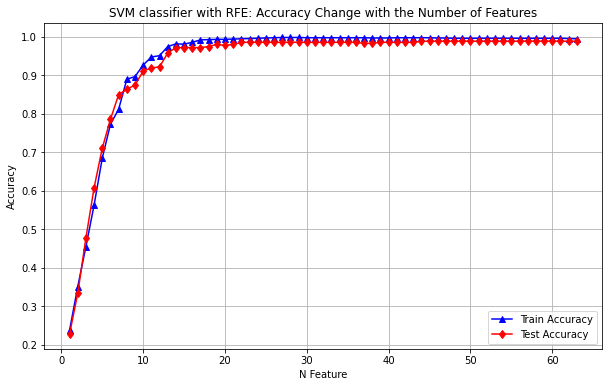

In [73]:
# SVM classifier with RFE
def rfe_classifier(X_train, y_train, X_test, y_test):
    tr_accs, ts_accs = [], []
    for n_feature in range(1, X_train.shape[1]):
        rfe = RFE(estimator=SVC(kernel="linear"), n_features_to_select=n_feature)
        rfe.fit(X_train, y_train)
        t_X_tr, t_x_ts = rfe.transform(X_train), rfe.transform(X_test)
        clf, tr_acc = train(t_X_tr, y_train)
        ts_acc = test(clf, t_x_ts, y_test)
        tr_accs.append(tr_acc)
        ts_accs.append(ts_acc)
    return tr_accs, ts_accs

# It takes a while to train and test 64 models, you can get the best result with 44 features
tr_accs, ts_accs = rfe_classifier(X_train, y_train, X_test, y_test)
best_ts_acc = max(ts_accs)
best_ts_acc_index = ts_accs.index(best_ts_acc)
best_tr_acc = tr_accs[best_ts_acc_index]
print("Best Performing Number of Selected Features: {}".format(best_ts_acc_index + 1))
print("Train Acc: {:.4f}%\nTest Acc: {:.4f}%".format(best_tr_acc*100, best_ts_acc*100))

plt.figure(figsize=(10,6))
plt.plot(range(1, X_train.shape[1]), tr_accs, linestyle='-', marker='^', color='b', label='Train Accuracy')
plt.plot(range(1, X_train.shape[1]), ts_accs, linestyle='-', marker='d', color='r', label='Test Accuracy')
plt.title('SVM classifier with RFE: Accuracy Change with the Number of Features')
plt.xlabel('N Feature')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

**(4 points)** Experiment 3: Train an SVM classifier using **Seleck K Best** as feature selection method. Select your features based on the X_train and y_train, then define your new train and test sets using the features that you selected. Print the number of selected features, training accuracy and test accuracy.

Best Performing Number of Selected Features: 34
Train Acc: 99.5825%
Test Acc: 98.8889%


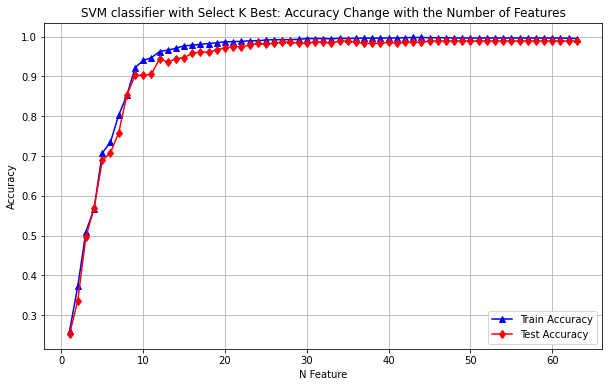

In [74]:
# SVM classifier with Select K Best
def skb_classifier(X_train, y_train, X_test, y_test):
    tr_accs, ts_accs = [], []
    for n_feature in range(1, X_train.shape[1]):
        skb = SelectKBest(k=n_feature)
        skb.fit(X_train, y_train)
        t_X_tr, t_x_ts = skb.transform(X_train), skb.transform(X_test)
        clf, tr_acc = train(t_X_tr, y_train)
        ts_acc = test(clf, t_x_ts, y_test)
        tr_accs.append(tr_acc)
        ts_accs.append(ts_acc)
    return tr_accs, ts_accs

# It takes a while to train and test 64 models, you can get the best result with 34 features
tr_accs, ts_accs = skb_classifier(X_train, y_train, X_test, y_test)
best_ts_acc = max(ts_accs)
best_ts_acc_index = ts_accs.index(best_ts_acc)
best_tr_acc = tr_accs[best_ts_acc_index]
print("Best Performing Number of Selected Features: {}".format(best_ts_acc_index + 1))
print("Train Acc: {:.4f}%\nTest Acc: {:.4f}%".format(best_tr_acc*100, best_ts_acc*100))

plt.figure(figsize=(10,6))
plt.plot(range(1, X_train.shape[1]), tr_accs, linestyle='-', marker='^', color='b', label='Train Accuracy')
plt.plot(range(1, X_train.shape[1]), ts_accs, linestyle='-', marker='d', color='r', label='Test Accuracy')
plt.title('SVM classifier with Select K Best: Accuracy Change with the Number of Features')
plt.xlabel('N Feature')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

**(5 points)** Answer following questions based on your results.

   - Which approach is better (with or without feature selection)? Why?
   - What is the effect of number of selected features on the performance?
   - What type of feature selection methods we have used (the types of RFE and SelectKBest)? What is the main difference between them? 

*Double click here to insert your answer*

## Part 3: Solving SVM optimization by hand (40 points)

You can insert the screenshots of your handwritten solution on Jupyter Notebook. For an example, check the cells including images. Do not forget to include your solution image file into the submitted .zip file.

Some reminders for the question:

 - Lagrangian to optimize: $\mathcal{L}_{primal} = \sum_{i=1}^{n} a_{i} - \frac{1}{2} [\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_{i}\alpha_{j}y_{i}y_{j}x_{i}^{T}x^{j}] $ 


- Constraint: $\sum_{i=1}^{n} \alpha_{i} y_{i} = 0$


- Optimal parameter: $w^{*} = \sum_{i=1}^{n} \alpha_{i} y_{i} x^{i}$

### Part 3.1 (20 points)

<p style="float: left;"><img src="images/part3-1.png" width = "200"></p>
        
        Given the two following training samples (n=2), provide below a step-by-step solution
        to estimate the optimal parameters (w and b) of the hyperplane separating the two classes.

### Part 3.1 Solution

<img src="images/part3.1.jpeg" width = "800">

### Part 3.2 (10 points) 
If we add a third training point $x^3 = \left [\begin{matrix} 4 \\ 4 \end{matrix}\right] $, will that impact the hyperplane estimated using points $x^1$ and $x^2$? Justify. 

### Part 3.2 Solution
Explanations are handwritten within the solutions.

<img src="images/part3.2.1.jpeg" width = "800">

<img src="images/part3.2.2.jpeg" width = "800">

### Part 3.3 (10 points)
Explain how to classify the point $x^{test} = \left [\begin{matrix} -1 \\ 0 \end{matrix}\right] $ using the estimated model. What is the predicted label of $x^{test}$? 

### Part 3.3 Solution

Explanations are handwritten within the solutions.

<img src="images/part3.3.jpeg" width = "800">